In [2]:
import tensorflow as tf # Import tensorflow library
import matplotlib.pyplot as plt # Import matplotlib library
#import tensorflow_datasets as tfds
import numpy as np
from emnist import extract_training_samples, extract_test_samples

In [26]:
## adding labels to a dictionary to their corresponding alphabets
a_uc = "A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(',')
a_lc= "a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z".split(',')
dic={}

for i in range(10,36):
    dic[i]= a_uc[i-10]

for i in range(36,62):
    dic[i]= a_lc[i-36]
    
print(dic.items())

dict_items([(10, 'A'), (11, 'B'), (12, 'C'), (13, 'D'), (14, 'E'), (15, 'F'), (16, 'G'), (17, 'H'), (18, 'I'), (19, 'J'), (20, 'K'), (21, 'L'), (22, 'M'), (23, 'N'), (24, 'O'), (25, 'P'), (26, 'Q'), (27, 'R'), (28, 'S'), (29, 'T'), (30, 'U'), (31, 'V'), (32, 'W'), (33, 'X'), (34, 'Y'), (35, 'Z'), (36, 'a'), (37, 'b'), (38, 'c'), (39, 'd'), (40, 'e'), (41, 'f'), (42, 'g'), (43, 'h'), (44, 'i'), (45, 'j'), (46, 'k'), (47, 'l'), (48, 'm'), (49, 'n'), (50, 'o'), (51, 'p'), (52, 'q'), (53, 'r'), (54, 's'), (55, 't'), (56, 'u'), (57, 'v'), (58, 'w'), (59, 'x'), (60, 'y'), (61, 'z')])


In [36]:
x_train, y_train = extract_training_samples('byclass')
x_test, y_test =extract_test_samples('byclass')
x_train.shape

(697932, 28, 28)

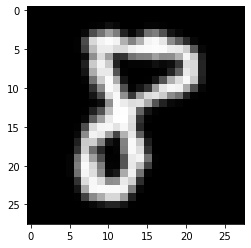

In [4]:
plt.imshow(x_train[112], cmap="gray") # Import the image
plt.show() # Plot the image

In [5]:
# Normalize the train dataset
x_train = tf.keras.utils.normalize(x_train, axis=1)
# Normalize the test dataset
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [6]:
#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(62, activation=tf.nn.softmax))

In [7]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
model.fit(x=x_train, y=y_train, epochs=5) # Start training process

Train on 697932 samples
Epoch 1/5
697932/697932 [==============================] - 48s 69us/sample - loss: 0.6668 - accuracy: 0.7863
Epoch 2/5
697932/697932 [==============================] - 48s 69us/sample - loss: 0.5046 - accuracy: 0.8262
Epoch 3/5
697932/697932 [==============================] - 49s 70us/sample - loss: 0.4759 - accuracy: 0.8339
Epoch 4/5
697932/697932 [==============================] - 49s 70us/sample - loss: 0.4616 - accuracy: 0.8378
Epoch 5/5
697932/697932 [==============================] - 48s 69us/sample - loss: 0.4531 - accuracy: 0.8402


In [35]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Test accuracy: 0.83238053


In [10]:
predictions = model.predict([x_test]) # Make prediction

In [33]:
print(dic[np.argmax(predictions[13421])])# Print out the number

e


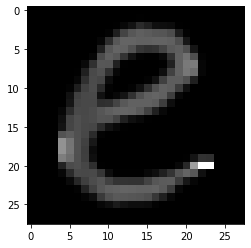

In [34]:
plt.imshow(x_test[13421], cmap="gray") # Import the image
plt.show() # Show the image